In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from codex import data as codex_data
from codex import config as codex_config
from codex import io as codex_io
from codex.ops import best_focus
import numpy as np

Load an experiment tile:

In [7]:
exp_path = '/lab/data/20180614_D22_RepA_Tcell_CD4-CD8-DAPI_5by5'
config = codex_config.load(exp_path + '/config')

In [76]:
tile = codex_io.read_tile('/lab/data/20180614_D22_RepA_Tcell_CD4-CD8-DAPI_5by5/output/nodeconv/reg001_X03_Y01.tif', config)
tile.shape, tile.dtype

((1, 25, 3, 1008, 1344), dtype('uint8'))

In [77]:
tile.min(), tile.mean(), tile.max()

(0, 30.41129830404384, 255)

Create the best focus op:

In [ ]:
op = best_focus.CodexFocalPlaneSelector(config).initialize()

In [67]:
res = op.run(tile)

In [68]:
res[1:3]

(12,
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 6, 6, 6, 8, 8, 8, 8])

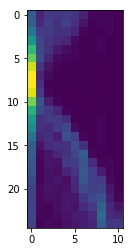

In [70]:
plt.imshow(np.array(res[3]))

In [74]:
np.array(res[3])[:5]

array([[0.23961616, 0.08336375, 0.14550596, 0.14078302, 0.14587295,
        0.1302437 , 0.07814622, 0.0104195 , 0.01562924, 0.0104195 ,
        0.        ],
       [0.26041667, 0.10416667, 0.15625   , 0.125     , 0.16666667,
        0.11458333, 0.046875  , 0.00520833, 0.01041667, 0.01041667,
        0.        ],
       [0.32813977, 0.1562234 , 0.14583668, 0.12500287, 0.12500287,
        0.0885437 , 0.01562536, 0.        , 0.00520845, 0.01041691,
        0.        ],
       [0.44270833, 0.18229167, 0.13020833, 0.109375  , 0.09375   ,
        0.02083333, 0.00520833, 0.        , 0.015625  , 0.        ,
        0.        ],
       [0.57283661, 0.18234804, 0.1250121 , 0.06250605, 0.03125302,
        0.01041767, 0.00520884, 0.        , 0.01041767, 0.        ,
        0.        ]])

In [71]:
np.array(res[3]).shape

(25, 11)

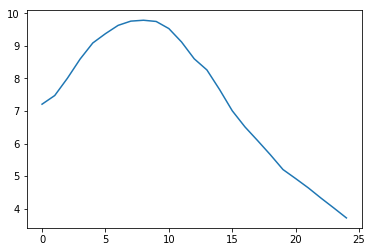

In [73]:
plt.plot(np.dot(np.array(res[3]), np.arange(11)[::-1]))